# 11.1. Image Segmentation

图像分割是标记图像中感兴趣像素对象的任务。

在本教程中，我们将了解如何从背景中分割对象。我们使用 `skimage.data` 中的 `coins` 图像。该图像显示了在较暗的背景下勾勒出的几枚硬币的轮廓。硬币的分割不能直接从灰度值直方图完成，因为背景与硬币共享足够的灰度级，阈值分割是不够的。

Text(0.5, 1.0, 'histogram of gray values')

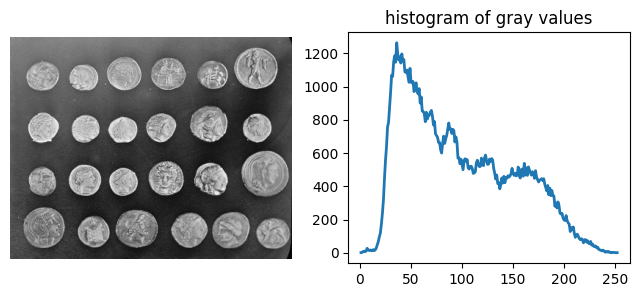

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram

coins = data.coins()
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [2]:
from skimage import data
from skimage.exposure import histogram
coins = data.coins()
hist, hist_centers = histogram(coins)

简单地对图像进行阈值处理会导致丢失硬币的重要部分，或者将部分背景与硬币合并。这是由于图像的光照不均匀造成的。

![](https://scikit-image.org/docs/stable/_images/sphx_glr_plot_coins_segmentation_002.png)

第一个想法是利用局部对比度，即使用梯度而不是灰度值。

## 11.1.1. Edge-based segmentation

**11.1.1.基于边的分割**

让我们首先尝试检测包围硬币的边(edges)。对于边检测，我们使用 `skimage.feature.canny` 的 [Canny detector](https://en.wikipedia.org/wiki/Canny_edge_detector)

In [13]:
from skimage.feature import canny
edges = canny(coins/255.)

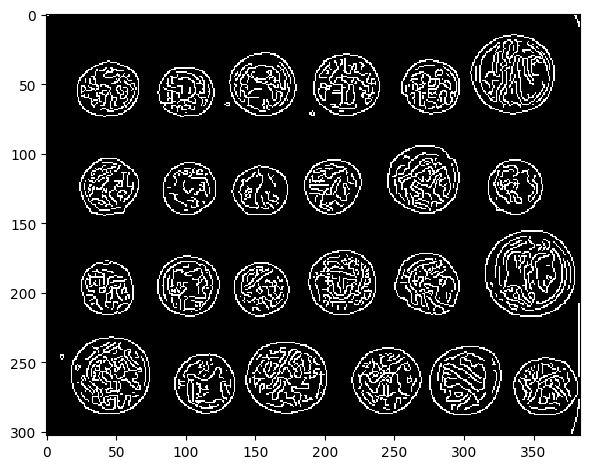

In [20]:
from skimage import io
io.imshow(edges)

现在我们有了描绘硬币外部边界的轮廓，我们使用 `ndi.binary_fill_holes` 函数填充硬币的内部，该函数使用数学形态学来填充孔。